# Time-dependent S.E., matrix formulation

Here we develop a different approach, which will lead us to an *implicit* algorithm: The thing on the L.H.S that we want is also on the R.H.S, and can't just be moved over. (You'll see what I mean when I get there.) 

Recall that we can write the formal solution to the time-dependent Schroedinger equation by evolving the wave function in time with the Hamiltonian as follows:

$$\psi(x,t) = \exp\left(-it\hat{H}/\hbar\right)\psi(x,0) \tag{1}$$

Hey! We just solved all of quantum mechanics! (**Question:** why is this not true?)

The reason why this not terribly useful is that $H$ is an *operator.* To see why this complicates life (and physics), let's rewrite the L.H.S. of Eq. 1 as a Taylor series:

$$\exp\left(-it\hat{H}/\hbar\right)\psi = \left(1-\frac{it}{\hbar}\hat{H} - \frac{t^2}{2\hbar^2}\hat{H}^2 + \cdots \right)\psi \tag{2}$$

The difficulty is that $\hat{H}^2$ means "apply $H$ twice in a row." Let's see how this works by writing it out explicitly, substituting for $\hat{H}$:

$$\hat{H}^2\psi = \hat{H}\hat{H}\psi = \left[-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V(x) \right]\left[-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} +V(x) \right]\psi \tag{3}$$

Applying $V$ to $\psi$, then the derivative is *different* than applying the derivative, then $V$, because in general they do not commute! Operators make life difficult. It gets worse when you start going to higher order terms in Eq. 2. A lot worse. And where do you stop?

Maybe we can make progress by taking $\Delta t$ to be very small. We are in search of a numerical method after all, and we can make the timestep as small as we like. Then the wavefunction at $t+\Delta t$ can be found from $t$ formally by

$$\psi(x,t+\Delta t) = \exp\left(-i\Delta t\hat{H}/\hbar\right)\psi(x,t) \tag{4}$$

and we imagine making $\Delta t$ small enough that we can stop at the linear term in the Taylor series (Eq. 2):

$$\begin{align} 
\psi(x,t+\Delta t) & \approx \left[1-\frac{i\Delta t\hat{H}}{\hbar} \right]\psi(x,t)\\
& = \left[ 1 + \frac{i\Delta t}{2} \frac{\partial^2}{\partial x^2} - i\Delta t V(x)\right]\psi(x,t) \tag{5} \\
& \approx \psi(x_n, t_i) + \frac{i\Delta t}{2\Delta x^2}\left[\psi(x_{n+1},t_{i} -2\psi(x_{n},t_{i}) + \psi(x_{n-1},t_{i} \right] +i\Delta tV(x_n)\psi(x_n,t_{i}) \tag{6} \\
\end{align}$$

## Problem #1: Stability

This is a linear expansion, and (just like our Euler scheme that we tried last time) it is unstable. The reason is that our timestep $\Delta t$ appears in the exponential...so no matter what we do, the error grows without bound. A minor looking modification, however, makes it stable. Instead of propagating forward in time with $\exp(-i\Delta t \hat{H}/\hbar)$, we go backwards in time by replacing $\Delta t$ with $-\Delta t$. (Rather than predicting, we are correcting, sort of.) If you feel like we got something for free, you will soon see that we did not!

We can compute $\psi(x, t)$ from $\psi(x,t+\Delta t)$ via

$$\begin{align}
\psi(x,t) &= \exp(+i\Delta t/\hbar)\psi(x,t+\Delta t) \\
& \approx (1 + i\Delta t\hat{H}/\hbar)\psi(x,t+\Delta t) \tag{7}\\
\end{align}$$

The discretized version of this equation looks as follows:

$$\psi(x_n, t_i) \approx \psi(x_n,t_{i+1})-\frac{i\Delta t}{2\Delta x^2}\left[\psi(x_{n+1},t_{i+i} -2\psi(x_{n},t_{i+i}) + \psi(x_{n-1},t_{i+i} \right] +i\Delta tV(x_n)\psi(x_n,t_{i+1}) \tag{8}$$

Compare Eqs 6 and 8: In order to update the value of the wavefunction at grid point $n$ at time $t_{i+1}$, you need the value of the wavefunction at grid points $n-1$ and $n+1$...*also at the same time $t_{n+1}$.* At first glance that seems ludicrous, but recognize that the R.H.S. can be expressed as a matrix equation: At a given time $t_{n+1}$, our discretized wavefunction is a vector (with a number of elements equal to the number of grid points.) The thing that multiplies it is a discretized version of the Hamiltonian, i.e., a matrix. So we could use this expression to solve our problem...but first we have to *invert* the matrix on the R.H.S., move it over to the left, and voila. This is called an *implicit* algorithm.

## Problem #2: Unitarity

But wait! It gets worse. Neither Eq. 6 or Eq. 8 preserves Unitarity. The reason is the truncation of the Taylor series at the linear term: $\exp[-i\Delta t\hat{H}/\hbar]$ is a Unitary operator, $1 - i\Delta t \hat{H}/\hbar$ is not. This problem is rectified by using the *Cayley form* to approximate the exponential: 

$$\exp(-i\Delta t \hat{H}/\hbar) \approx \frac{1-i\Delta t\hat{H}/2\hbar}{1+i\Delta t\hat{H}/2\hbar} \tag{9}$$

Very roughly speaking, when we made the simpler linear approximations forward and backward in time (Eqs 5 and 7), we screwed up the symmetry of the time-evolution operator that is responsible for Unitarity, and by using the Cayley form we restore it. To obtain the implicit algorithm from here, apply the Cayley for of the (approximate) time-evolution operator, move the denominator to the LHS, then discretize:

$$\psi(x,t+\Delta t) \approx \frac{1-i\Delta t\hat{H}/2\hbar}{1+i\Delta t\hat{H}/2\hbar} \psi(x,t) \tag{10}$$

$$\left[1+i\Delta t\hat{H}/2\hbar\right]\psi(x,t+\Delta t) = \left[1-i\Delta t\hat{H}/2\hbar \right]\psi(x,t)\tag{11}$$

Now we set $\hbar = m = 1$ again, and replace $\partial^2/\partial x^2$ by its finite difference form on each side. I'll just write it out for the L.H.S., then quote the final result. You are encouraged to work through the details!

$$\begin{align}
\left[1+i\frac{\Delta t\hat{H}}{2}\right]\psi(x,t+\Delta t) & = \left[1 + \frac{i\Delta t}{2}\left(-\frac{1}{2}\frac{\partial^2}{\partial x^2} + V(x) \right) \right]\psi(x,t+\Delta t) \\
& \approx \psi(x_n,t_{i+1}) + \frac{i\Delta t}{2}\left[-\frac{1}{2}\left(\frac{\psi(x_{n+1},t_{i+1}) - 2\psi(x_n,t_{i+1}) + \psi(x_{n-1},t_{i+1})}{\Delta x^2} \right) + V(n)\psi(x_n,t_{i+1}) \right] \\
& = \psi(x_n,t_{i+1}) - \frac{\Delta t}{2}\left[\frac{i}{2\Delta x^2}\left[\psi(x_{n+1},t_{i+1}) - 2\psi(x_n,t_{i+1}) + \psi(x_{n-1},t_{i+1})\right]-iV(x_n)\psi(x_n,t_{i+1}) \right] \\
& = \psi(x_n,t_{i+1}) -iq\left[\psi(x_{n+1},t_{i+1}) - 2\psi(x_n,t_{i+1}) + \psi(x_{n-1},t_{i+1})\right] +\frac{i\Delta t}{2}V(x_n)\psi(x_n,t_{i+1}) \\
& = -iq\psi(x_{n+1},t_{i+1}) + \left[1 + 2iq + \frac{i\Delta t}{2}V(x_n) \right]\psi(x_n,t_{i+1}) -iq \psi(x_{n-1},t_{i+1}) \tag{12} \\
& = -iq \psi(x_{n+1},t_{i+1}) + Q_n\psi(x_n,t_{i+1}) - -iq \psi(x_{n-1},t_{i+1}) \tag{13} \\
\end{align}$$

where we have defined $q \equiv \Delta t/4\Delta x^2$ and $Q_n = 1 + 2iq + \frac{i\Delta t}{2}V(x_n)$ to simplify the notation. Note that we can express equation 13 in matrix form:

$$\mathcal{A}\mathbf{\Psi}(t_{i+i}) = \left(\begin{array}{ccccc} 
Q_0 & -iq & 0 & \cdots & 0\\
-iq & Q_1 & -iq & \cdots & 0 \\
0 & -iq & Q_2 & \cdots & 0\\
\vdots & \vdots & \vdots & \ddots & -iq\\
0 & 0 & 0 & -iq & Q_N \\
\end{array}\right)
\left(\begin{array}{c}
\psi(x_{n=0},t_{i+1}) \\
\psi(x_{n=1},t_{i+1}) \\
\psi(x_{n=2},t_{i+1})\\
\vdots \\
\psi(x_{n=N},t_{i+1})\\
\end{array}\right)$$

The R.H.S. of equation 10 is handled the same way, except that $-iq$ become $iq$ and the diagonal becomes $D_n = 1 - 2iq - i\Delta t V_n/2$. Then we have for the R.H.S.:

$$\mathcal{B}\mathbf{\Psi}(t_{i}) = \left(\begin{array}{ccccc} 
D_0 & iq & 0 & \cdots & 0\\
iq & D_1 & iq & \cdots & 0 \\
0 & iq & D_2 & \cdots & 0\\
\vdots & \vdots & \vdots & \ddots & iq\\
0 & 0 & 0 & iq & D_N \\
\end{array}\right)
\left(\begin{array}{c}
\psi(x_{n=0},t_i) \\
\psi(x_{n=1},t_i) \\
\psi(x_{n=2},t_i)\\
\vdots \\
\psi(x_{n=N},t_i)\\
\end{array}\right)$$

With these definitions, we can write Eq. 10 as 

$$\mathcal{A}\mathbf{\Psi}(t_{i+i}) = \mathcal{B}\mathbf{\Psi}(t_{i})$$

To go from the $i$ to the $i+1$ step we have to invert $\mathcal{A}$:

$$\mathbf{\Psi}(t_{i+i}) = \mathcal{A}^{-1}\mathcal{B}\mathbf{\Psi}(t_{i})$$

norm: 
 4.223889340587382
dt_dx: 
 0.2


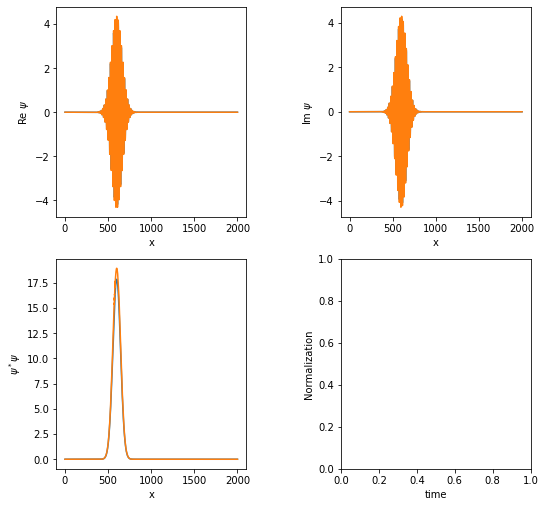

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv

# integrator params
dt = 0.0000001
dx = 0.0005
tot_steps = 200

# initial wf params
sig_sqr = 0.0005
x0 = 0.3
k0 = 700
C = 1.0/(2.0*np.pi*sig_sqr)**0.25
print("norm: \n", C)
dt_dx = dt/(2.0*dx**2)
print("dt_dx: \n", dt_dx)


# total domain width
L = 1.0
#number of x grid points
Nx = int(L/dx)

#initialize our array. timesteps are the rows, x grid points are the columns
tmp = np.complex(0.0,0.0)
psi = [[tmp for j in range(0,Nx+2)] for i in range(0,tot_steps+1)]
Re = [[0.0 for j in range(0,Nx+2)] for i in range(0,tot_steps+1)]
Im = [[0.0 for j in range(0,Nx+2)] for i in range(0,tot_steps+1)]
#Re_2 = [[0.0 for j in range(0,Nx+2)] for i in range(0,tot_steps+1)]
#Im_2 = [[0.0 for j in range(0,Nx+2)] for i in range(0,tot_steps+1)]
#psi_sqr = [[0.0 for j in range(0,Nx+2)] for i in range(0,tot_steps+1)]
psi_sqr = [[0.0 for j in range(0,Nx+2)] for i in range(0,tot_steps+1)]

#I'll use this to store the normalization of the wf (sum over all the grid points
# psi*psi) to check whether it stays normalized...like checking 
norm = []
expect_x = []  ## this will hold <x>
expect_x2 = [] ## this will hold <x**2>
psi_sig_sqr = [] ## this will hold the variance, <x**2> - <x>**2


#initialize the wavefunction
total = 0
x_total = 0
x2_total = 0

for j in range(0,Nx+1):
    # find where you are in x
    x = j*dx
    tmp1 = C*np.cos(k0*(x-x0))*np.exp((-(x-x0)**2)/(4.0*sig_sqr))
    tmp2 = C*np.sin(k0*(x-x0))*np.exp((-(x-x0)**2)/(4.0*sig_sqr))
    Re[0][j] = tmp1
    Im[0][j] = tmp2
    #psi_sqr[0][j] = Re[0][j]*Re[0][j] + Im[0][j]*Im[0][j]
    
    psi[0][j] = np.complex(tmp1,tmp2)
    psi_sqr[0][j] = (np.abs(psi[0][j]))**2
    #Re_2[0][j] = np.real(psi[0][j])
    #Im_2[0][j] = np.imag(psi[0][j])
    # integrate to get the normalization. note that you have to multiply by dx
    total = total + dx*psi_sqr[0][j]  # integral of psi*psi
    x_total = x_total + dx*x*psi_sqr[0][j] # integral psi*x*psi
    x2_total = x2_total + dx*x*x*psi_sqr[0][j] # integral of psi*x^2*psi

# add the current normalization to the list   
norm.append(total)
expect_x.append(x_total)
expect_x2.append(x2_total)
tmp = x2_total - x_total*x_total
psi_sig_sqr.append(tmp)


# build the matrices A and B
q = dt/(4.0*dx**2)
Q = np.complex(1.0,2.0*q) # note that both Q and D depend on the grid point if V =/= 0
D = np.complex(1.0,-2.0*q)
A = [[0.0 for j in range(0,Nx+2)] for i in range(0,Nx+2)]
B = [[0.0 for j in range(0,Nx+2)] for i in range(0,Nx+2)]

for i in range(0,Nx+2):
    A[i][i] = Q
    B[i][i] = D
    if i == 0:
        A[i][i+1] = np.complex(0.0,-1.0*q)
        B[i][i+1] = np.complex(0.0,q)
    elif i == Nx+1:
        A[i][i-1] = np.complex(0.0,-1.0*q)
        B[i][i-1] = np.complex(0.0,q)
    else:
        A[i][i+1] = np.complex(0.0,-1.0*q)
        A[i][i-1] = np.complex(0.0,-1.0*q)
        B[i][i+1] = np.complex(0.0,q)
        B[i][i-1] = np.complex(0.0,q)

A_inv = inv(A)  ## does this exploit tridiagonal form?
C = np.matmul(A,B) ## does this exploit tridiagonal form? 
    
for i in range(1,tot_steps):
    
    psi[i] = np.dot(C,psi[i-1])
    
    for j in range(0,Nx+1):
        tmp1 = np.real(psi[i][j])
        tmp2 = np.imag(psi[i][j])
        Re[i][j] = tmp1
        Im[i][j] = tmp2
        psi_sqr[i][j] = (np.abs(psi[i][j]))**2
    

plt.figure(1, figsize=(8.5, 8.5))
plt.subplots_adjust(wspace=0.5)
    
plt.figure(1, figsize=(10, 3))
plt.subplots_adjust(wspace=0.5)
ax = plt.subplot(221)
ax.set_xlabel('x')
ax.set_ylabel('Re $\psi$')
#ax.set_xlim(right=650)
#ax.set_xlim(left=550)
plt.plot(Re[0])
plt.plot(Re[199])

ax2 = plt.subplot(222)
ax2.set_xlabel('x')
ax2.set_ylabel('Im $\psi$')
#ax2.set_xlim(right=650)
#ax2.set_xlim(left=550)
#ax2.set_xlim(right=40)
plt.plot(Im[0])
plt.plot(Im[199])


ax3 = plt.subplot(223)
ax3.set_xlabel('x')
ax3.set_ylabel('$\psi^*\psi$')
#ax3.set_xlim(right=1050)
#ax3.set_xlim(left=950)
#ax2.set_xlim(right=40)
plt.plot(psi_sqr[0])
plt.plot(psi_sqr[199])

ax4 = plt.subplot(224)
ax4.set_xlabel('time')
ax4.set_ylabel('Normalization')
#ax2.set_xlim(right=1100)
#ax4.set_xlim(right=500)
#ax2.set_xlim(right=40)
#plt.plot(Im[999])
#plt.plot(norm)
#plt.plot(expect_x)
#plt.plot(expect_x2)
#plt.plot(psi_sig_sqr)


plt.show()
    

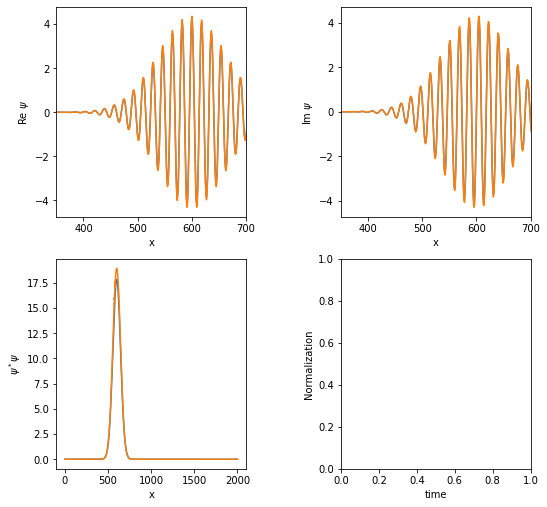

In [18]:
plt.figure(1, figsize=(8.5, 8.5))
plt.subplots_adjust(wspace=0.5)
    
plt.figure(1, figsize=(10, 3))
plt.subplots_adjust(wspace=0.5)
ax = plt.subplot(221)
ax.set_xlabel('x')
ax.set_ylabel('Re $\psi$')
ax.set_xlim(right=700)
ax.set_xlim(left=350)
plt.plot(Re[0])
plt.plot(Re[199])

ax2 = plt.subplot(222)
ax2.set_xlabel('x')
ax2.set_ylabel('Im $\psi$')
ax2.set_xlim(right=700)
ax2.set_xlim(left=350)
#ax2.set_xlim(right=40)
plt.plot(Im[0])
plt.plot(Im[199])


ax3 = plt.subplot(223)
ax3.set_xlabel('x')
ax3.set_ylabel('$\psi^*\psi$')
#ax3.set_xlim(right=1050)
#ax3.set_xlim(left=950)
#ax2.set_xlim(right=40)
plt.plot(psi_sqr[0])
plt.plot(psi_sqr[199])

ax4 = plt.subplot(224)
ax4.set_xlabel('time')
ax4.set_ylabel('Normalization')
#ax2.set_xlim(right=1100)
#ax4.set_xlim(right=500)
#ax2.set_xlim(right=40)
#plt.plot(Im[999])
#plt.plot(norm)
#plt.plot(expect_x)
#plt.plot(expect_x2)
#plt.plot(psi_sig_sqr)


plt.show()